## Module 6 Practice - Maps and Overlaying Spatial Data


In this notebook, we will see examples of **how to obtain map images and visualize data as layers on them using ggplot and Google maps.** 

**Google maps requires an API key to download its data and to use its geolocation services.** 

We will use DSA's api key as shown in the following examples. You can also obtain your own api key that comes with some free credit. 

Take a look at the [ggmap reference](https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf).

In [1]:
library(ggplot2)
library(ggmap)
library(maps)
library(maptools)
library(sp)

# Read the api key and register it. You have to run this at least once in a notebook 
# to be able to call ggmap functions below. 
apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Loading required package: sp
Checking rgeos availability: TRUE


**There are different ways of getting map images and display them in R.** 


We will start with **qmap()**; it is an easy mapping tool using ggmap library. 

Source : https://maps.googleapis.com/maps/api/staticmap?center=65201&zoom=14&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=65201&key=xxx


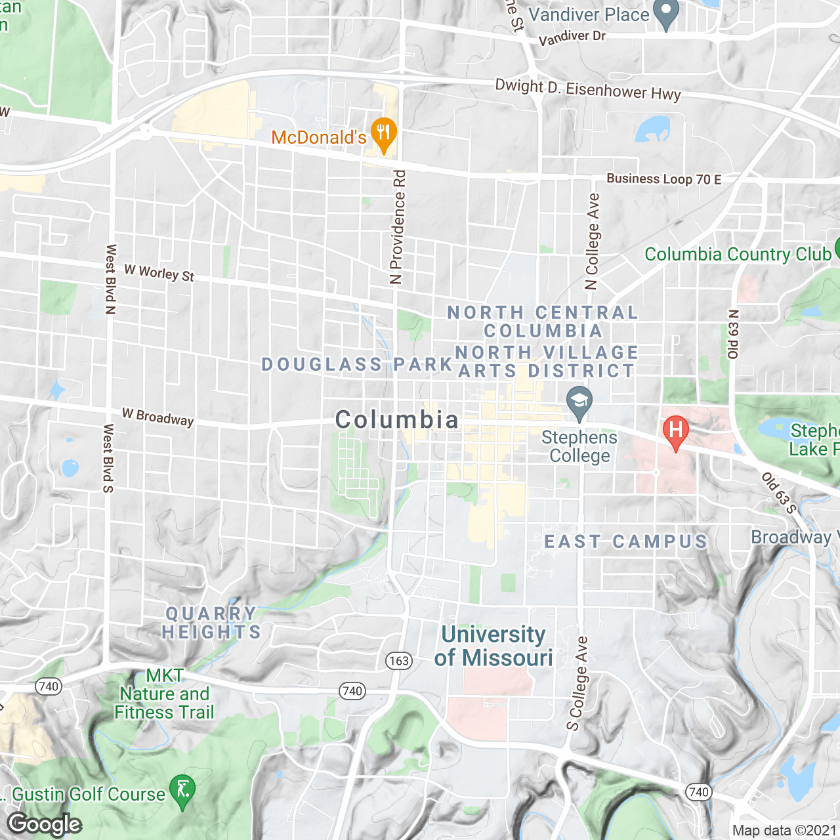

In [2]:
# get a map of Columbia, MO postal code 65201
qmap('65201', zoom = 14)

Source : https://maps.googleapis.com/maps/api/staticmap?center=65201&zoom=14&size=640x640&scale=2&maptype=satellite&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=65201&key=xxx


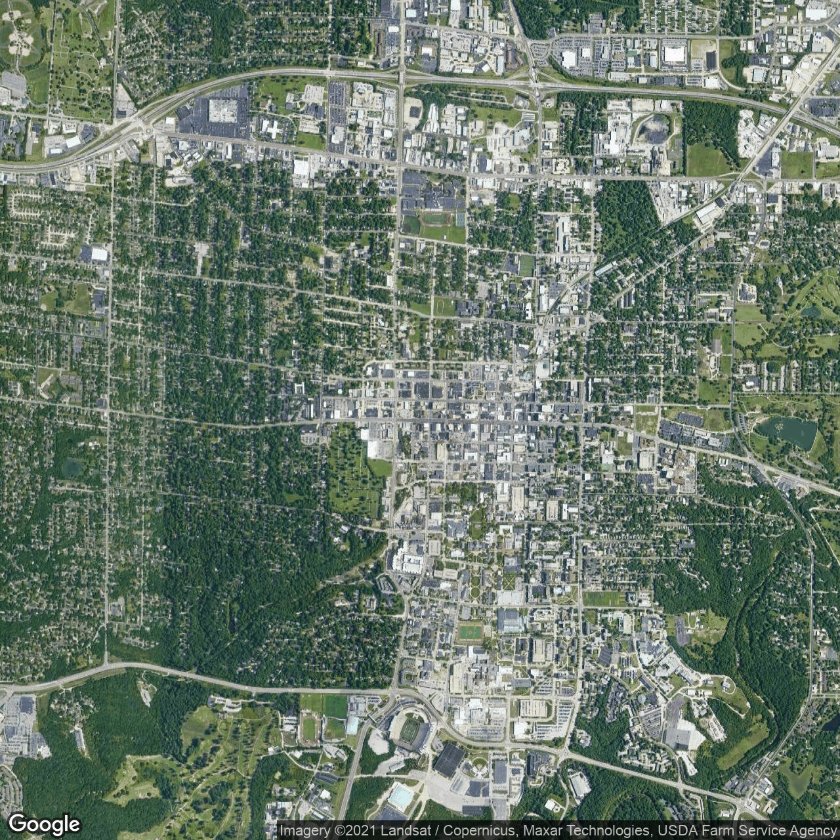

In [3]:
qmap('65201', zoom = 14, maptype = 'satellite')

Source : https://maps.googleapis.com/maps/api/staticmap?center=65201&zoom=14&size=640x640&scale=2&maptype=hybrid&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=65201&key=xxx


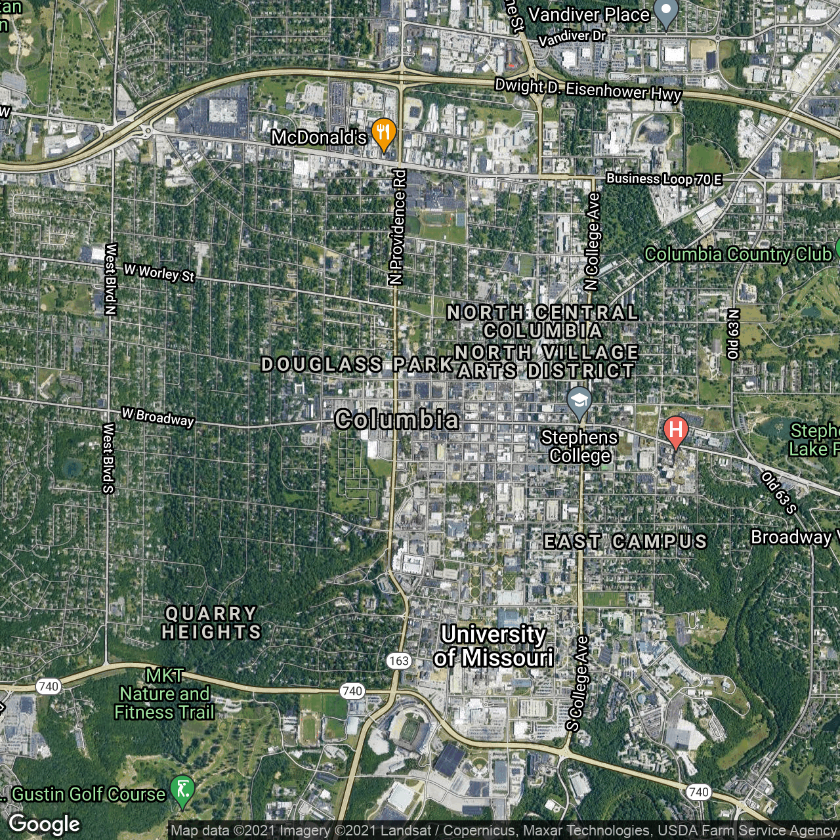

In [4]:
qmap('65201', zoom = 14, maptype = 'hybrid')

---


**get_map()** is a general function to grab map images from many online sources including Google Maps as default. We can also use **GetMap()** function of RgoogleMaps library. 

Source : https://maps.googleapis.com/maps/api/staticmap?center=houston,%20texas&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=houston,+texas&key=xxx


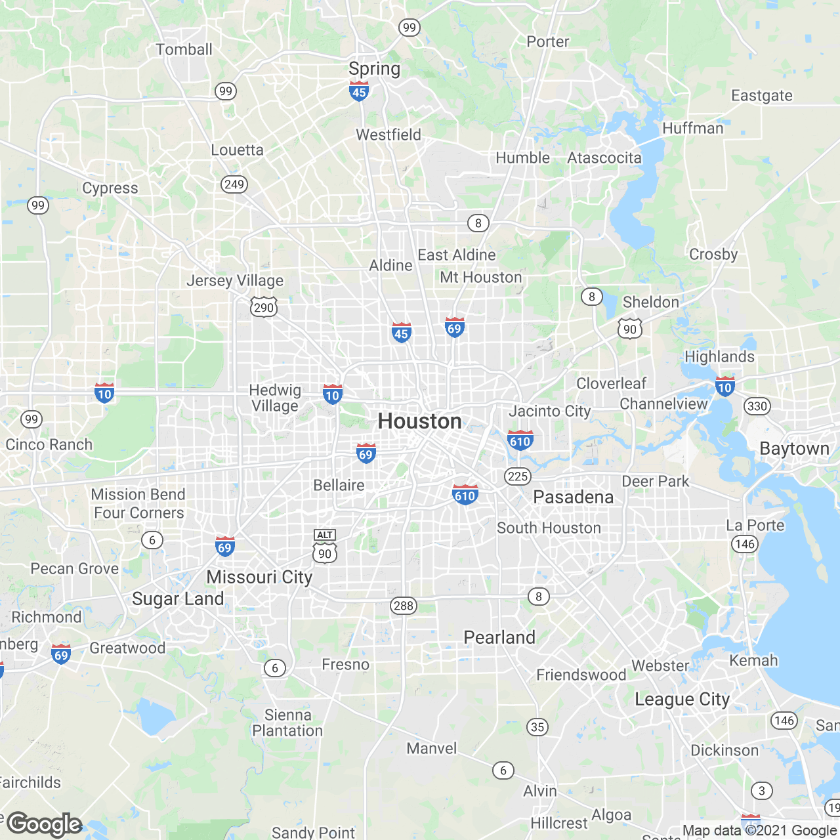

In [5]:
# Let's get a map of Houston
hdf <- get_map("houston, texas")
# and display it 
ggmap(hdf, extent = "device")

**Let's make some fake spatial data to show how to display it on the map.**


Using zoom = 11...
Source : http://tile.stamen.com/terrain/11/479/844.png
Source : http://tile.stamen.com/terrain/11/480/844.png
Source : http://tile.stamen.com/terrain/11/481/844.png
Source : http://tile.stamen.com/terrain/11/482/844.png
Source : http://tile.stamen.com/terrain/11/483/844.png
Source : http://tile.stamen.com/terrain/11/479/845.png
Source : http://tile.stamen.com/terrain/11/480/845.png
Source : http://tile.stamen.com/terrain/11/481/845.png
Source : http://tile.stamen.com/terrain/11/482/845.png
Source : http://tile.stamen.com/terrain/11/483/845.png
Source : http://tile.stamen.com/terrain/11/479/846.png
Source : http://tile.stamen.com/terrain/11/480/846.png
Source : http://tile.stamen.com/terrain/11/481/846.png
Source : http://tile.stamen.com/terrain/11/482/846.png
Source : http://tile.stamen.com/terrain/11/483/846.png
Source : http://tile.stamen.com/terrain/11/479/847.png
Source : http://tile.stamen.com/terrain/11/480/847.png
Source : http://tile.stamen.com/terrain/11/481

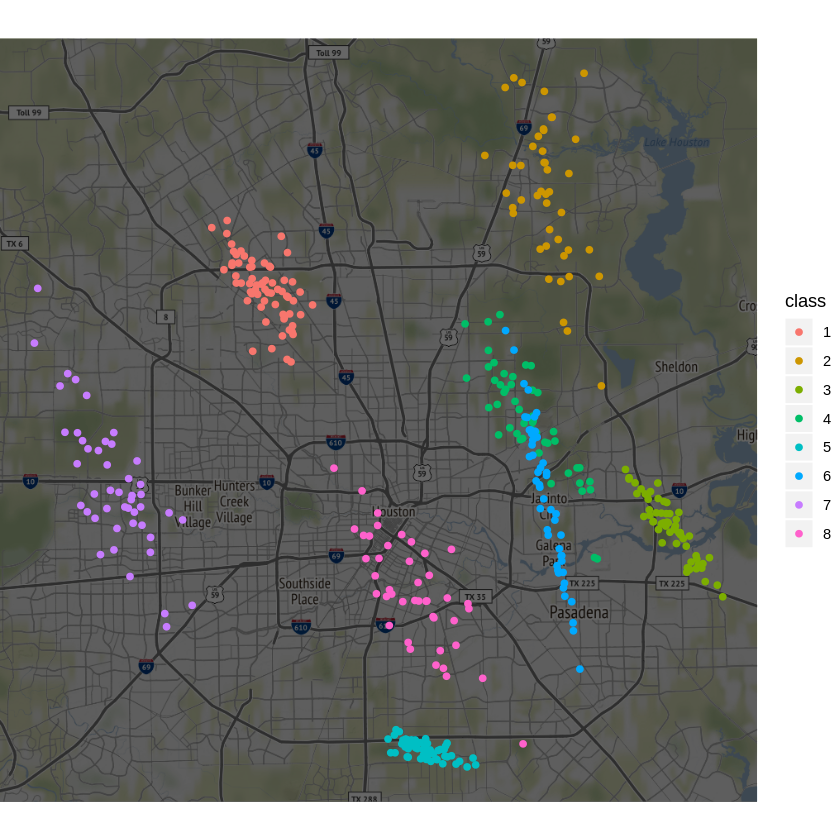

In [6]:
mu <- c(-95.3632715, 29.7632836); nDataSets <- sample(4:10,1)
chkpts <- NULL
for(k in 1:nDataSets){
 a <- rnorm(2); b <- rnorm(2);
 si <- 1/3000 * (outer(a,a) + outer(b,b))
 chkpts <- rbind(chkpts,cbind(MASS::mvrnorm(rpois(1,50), jitter(mu, .01), si), k))
}

chkpts <- data.frame(chkpts)
names(chkpts) <- c("lon", "lat","class")
chkpts$class <- factor(chkpts$class)

# qmplot is easier to use in this case: it'l collect the map from an online resource
qmplot(lon, lat, data = chkpts, color = class, darken = .6)

In [ ]:

# Let's create a density plot:
qmplot(lon, lat, data = chkpts, geom = "density2d", color = class, darken = .6)

In [ ]:
# or overlay it on a satellite image with ggplot 

ggmap(get_map(maptype = "satellite"), extent = "device") +

stat_density2d(aes(x = lon, y = lat, colour = class), data = chkpts, bins = 5)

---

**We can also create a shapefile-like layers on satellite image.**

In [ ]:
data(zips) # zip code areas

# remove the extra column 
df <- zips[-3]
head(df)

In [ ]:
ggmap(get_map(maptype = "satellite", zoom = 8), extent = "device") +

geom_polygon(aes(x=lon, y=lat, group=plotOrder), data=df, color="white", fill="red", alpha=.2, size=.4) 

#geom_path(aes(x=lon, y=lat, group=plotOrder), data=df, color="white", alpha=.4, size=.4)


---

### Let's do a crime plot on downtown Houston 

In [4]:
# pick only violent crimes
violent_crimes <- subset(crime,offense != "auto theft" & offense != "theft" & offense != "burglary")

# rank violent crimes
violent_crimes$offense <- factor(violent_crimes$offense, levels = c("robbery", "aggravated assault","rape", "murder"))

# restrict to downtown
violent_crimes <- subset(violent_crimes, -95.39681 <= lon & lon <= -95.34188 & 29.73631 <= lat & lat <= 29.78400)

In [ ]:
# get map and bounding box
theme_set(theme_bw(16))

HoustonMap <- ggmap(get_map("houston", zoom = 14, color = "bw"),extent = "device", legend = "topleft")

In [ ]:
# the bubble chart

HoustonMap +

geom_point(aes(x = lon, y = lat, colour = offense, size = offense), data = violent_crimes, alpha=0.6) +

scale_colour_discrete("Offense", labels = c("Robbery","Aggravated Assault","Rape","Murder")) +

scale_size_discrete("Offense", labels = c("Robbery","Aggravated Assault","Rape","Murder"), range = c(1.75,6)) +

guides(size = guide_legend(override.aes = list(size = 6))) +

theme(
   legend.key.size = grid::unit(1.8,"lines"),
   legend.title = element_text(size = 16, face = "bold"),
   legend.text = element_text(size = 14)
   ) +

labs(colour = "Offense", size = "Offense")

In [ ]:
# doing it with qmplot is even easier - let's use a toner friendly map 
qmplot(lon, lat, data = violent_crimes, maptype = "toner-lite", color = offense, alpha = 0.8, size = offense, legend = "topleft")


In [ ]:
# Let's do a contour plot
HoustonMap +

stat_density2d(aes(x = lon, y = lat, colour = offense),
               
size = 3, bins = 2, alpha = 3/4, data = violent_crimes) +

scale_colour_discrete("Offense", labels = c("Robery","Aggravated Assault","Rape","Murder")) +

theme(
   legend.text = element_text(size = 15, vjust = .5),
   legend.title = element_text(size = 15,face="bold"),
   legend.key.size = grid::unit(1.8,"lines")
)


In [ ]:
# and a 2d histogram:

HoustonMap +

stat_bin2d(aes(x = lon, y = lat, colour = offense, fill = offense), size = .5, bins = 30, alpha = 0.4, data = violent_crimes) +

scale_colour_discrete("Offense",labels = c("Robery","Aggravated Assault","Rape","Murder"),guide = FALSE) +

scale_fill_discrete("Offense", labels = c("Robery","Aggravated Assault","Rape","Murder")) +

theme(
   legend.text = element_text(size = 15, vjust = .5),
   legend.title = element_text(size = 15,face="bold"),
   legend.key.size = grid::unit(1.8,"lines")
)

**You may notice all the messages produced by different map servers get_map() is getting data from. To suppress them, you can use the suppressMessages() function.** 

### Let's do a crime density visualization.

In [2]:
# Let's get a color map and do a density plot with stat_density2d

houston <- suppressMessages(get_map("houston", zoom = 14))

HoustonMap <- ggmap(houston, extent = "device", legend = "topleft", darken = c(.5,"white")) # this whitens the map 

Warning message:
“Removed 11 rows containing non-finite values (stat_density2d).”

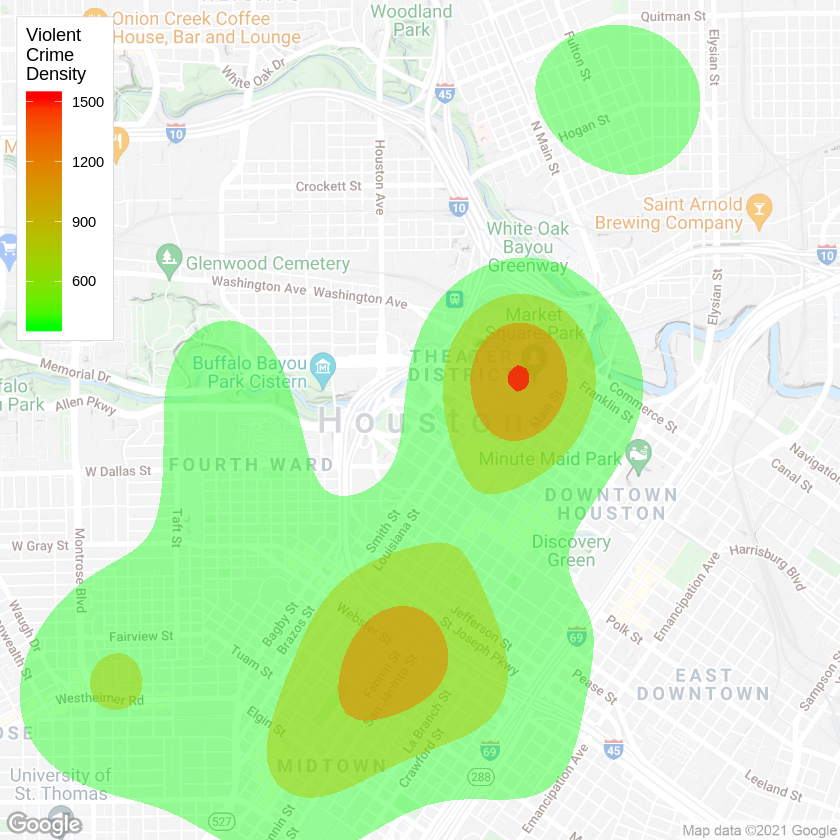

In [5]:
HoustonMap +

stat_density2d(aes(x = lon, y = lat, fill = ..level.., alpha = ..level..),size = 2, bins = 4, data = violent_crimes, geom = "polygon") +

scale_fill_gradient("Violent\nCrime\nDensity",low = "green", high = "red") + 

scale_alpha(range = c(0.4, 0.7), guide = FALSE) +

guides(fill = guide_colorbar(barwidth = 1.5, barheight = 10))


Warning message:
“Removed 11 rows containing non-finite values (stat_density2d).”Warning message:
“Removed 11 rows containing non-finite values (stat_density2d).”

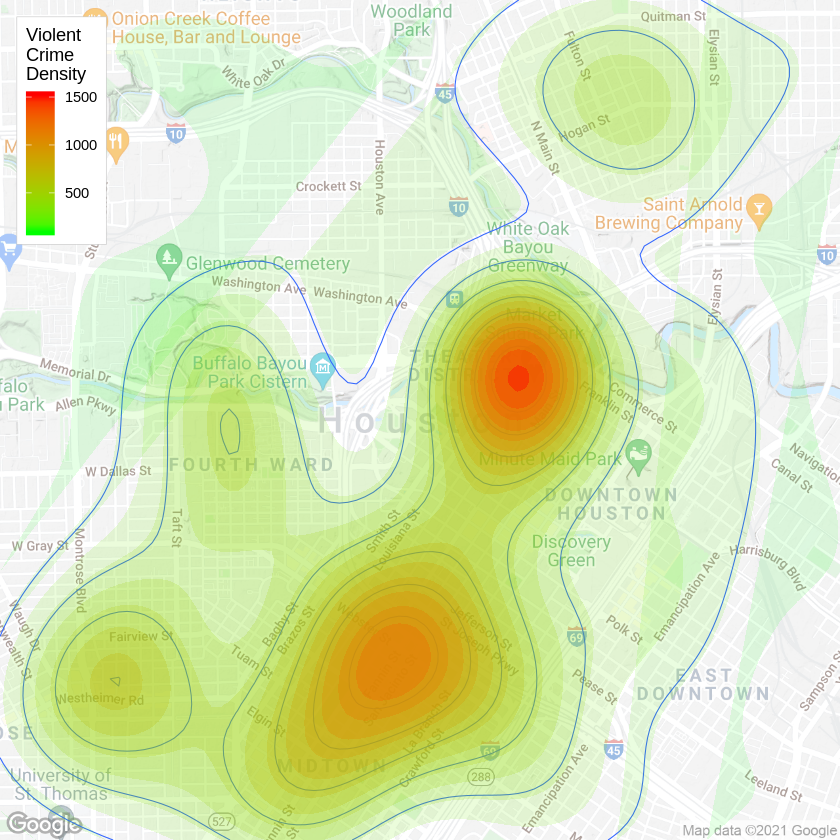

In [6]:
# Let's do a finer plot with 16 bins and add boundaries, too

HoustonMap +

geom_density2d(data = violent_crimes, aes(x = lon, y = lat), size = 0.3) + 

stat_density2d(data = violent_crimes, aes(x = lon, y = lat, fill = ..level.., alpha = ..level..), size = 0.01, bins = 16, geom = "polygon") + 

scale_fill_gradient("Violent\nCrime\nDensity",low = "green", high = "red") + 

scale_alpha(range = c(0.1, 0.4), guide = FALSE)


RgoogleMaps library also has its own functions to visualize maps and data. 

In [ ]:
# This is how to obtain a map image using RgoogleMaps library 
library(RgoogleMaps)
# Jesse Hall coordinates
lat = c(38.945092);
lon = c(-92.328806);
center = c(mean(lat), mean(lon));

Map <- GetMap(center=center, zoom=14); # You can also download from free map resources.

PlotOnStaticMap(Map, lat = lat, lon = lon, cex=1.5,pch=20, col=c('red'), add=FALSE);


**This is an example of how to find the center and zoom factor from the coordinates and get those tiles from server, and how to add Google-style markers to the map.** 


In [ ]:
# some coordinates 
lat = c(40.702147, 40.711614, 40.718217);
lon = c(-74.015794, -74.012318, -73.998284);

# computer center and zoom
center = c(mean(lat), mean(lon));
zoom <- min(MaxZoom(range(lat), range(lon)));

# get the map 
MyMap <- GetMap(center=center, zoom=zoom, markers = paste0("&markers=color:blue|label:S|",
           "40.702147,-74.015794&markers=color:green|label:G|40.711614,-74.012318&markers=",
           "color:red|color:red|label:C|40.718217,-73.998284"), destfile = "MyTile1.png"); 


PlotOnStaticMap(MyMap, lat = lat, 
                       lon = lon, 
                       destfile = "MyTile1.png", cex=1.5,pch=20,
                       col=c('red', 'blue', 'green'), add=FALSE);

#and add lines:
PlotOnStaticMap(MyMap, lat = c(40.702147,40.711614,40.718217), 
                       lon = c(-74.015794,-74.012318,-73.998284), 
                       lwd=1.5,col=c('red', 'blue', 'green'), FUN = lines, add=TRUE)


`NYleukemia` data set comes with the RgoogleMaps library. **Let's visualize the locations of cases using RgoogleMaps functions.**

In [ ]:
# This data set comes with the RgoogleMaps library 
data("NYleukemia")

head(NYleukemia$data)
population <- NYleukemia$data$population
cases <- NYleukemia$data$cases

geo <- NYleukemia$geo
head(geo)
lats <-geo$y
lons <-geo$x

mapNY <- GetMap(center=c(lat=42.67456,lon=-76.00365), destfile = "NYstate.png", maptype = "street", zoom=9); 
PlotOnStaticMap(mapNY, lat = lats, lon = lons, cex=2, pch=20, col="red", add=FALSE);

---

## Let's do it properly in ggplot:

ggplot can produce maps with more **concise syntax** as we have seen before. 

In [ ]:
# get the map 
NY <- suppressMessages(get_map("homer, new york", zoom = 9))

NYmap <- ggmap(NY, extent = "device", legend = "topleft", darken = c(.5,"white"))

# create a data frame 
NYdf <- data.frame(population, cases, lats, lons)
head(NYdf)

### Now, map data attributes to visual channels and pick color palette:

In [ ]:

NYmap + 

geom_point(data=NYdf, aes(x = lons, y = lats, color = cases, size = cases), alpha=0.7) + 

scale_color_gradient(low = "yellow", high = "red") + 

scale_alpha(range = c(0.1, 0.4), guide = FALSE)